# Air Quality Prediction

In [197]:
#Getting the data from the CSV file
import pandas as pd
df = pd.read_csv('Data/Train.csv')
data = df.values
print(data.shape)
x = data[:,:5]
print(x.shape)
y = data[:,5]
print(y.shape)

(1600, 6)
(1600, 5)
(1600,)


## Visualising data and Pre-processing


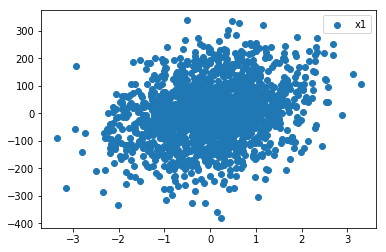

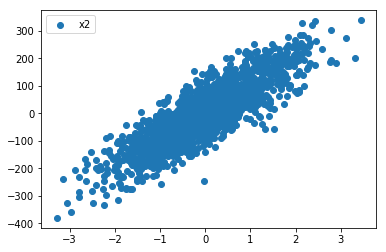

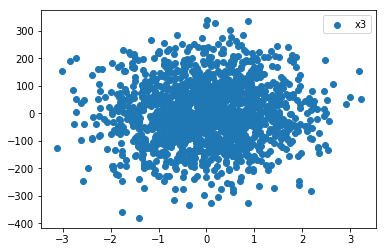

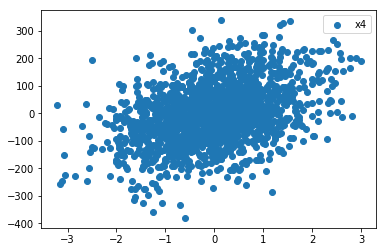

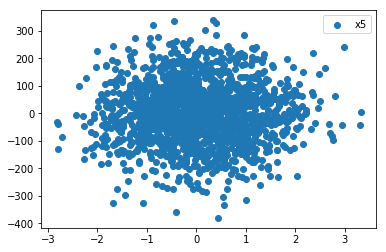

In [207]:
import matplotlib.pyplot as plt

#normalising the data
X = (x-x.mean())/x.std()
Y=y
for i in range(5):
    plt.scatter(X[:,i],Y, label = "x%d"%(i+1))
    plt.legend()
    plt.show()

## Gradient Descent Algorithm

In [208]:
import numpy as np

def hypothesis(x,theta):
    return theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3] + theta[5]*x[4]

def error(x,y,theta):
    e = 0
    m = x.shape[0]
    for i in range(m):
        h = hypothesis(x[i],theta)
        e += 0.5*(h - y[i])**2
    return e

def gradient(x,y,theta):
    grad = np.zeros((6,))
    for i in range(x.shape[0]):
        h = hypothesis(x[i],theta)
        grad[0] += (h - y[i])
        for j in range(x.shape[1]):
            grad[j+1] += (h - y[i])*x[i,j]
    return grad

def gradientDescent(x,y,learning_rate=0.0001, threshold_error=0.000000001, max_itr=10000):
    theta = np.zeros((6,))
    itr = 0
    err_list = []
    while itr<max_itr:
        itr += 1
        theta = theta - learning_rate*gradient(x,y,theta)
        e = error(x,y,theta)
        err_list.append(e)
        try:
            if err_list[-2]-e <= threshold_error:
                return theta, err_list
        except IndexError:
            pass
    return theta, err_list

In [209]:
final_theta, error_list = gradientDescent(X,Y)

In [210]:
#Final Theta
print(final_theta)

[ 1.49138683 29.8429702  93.1654065   8.32556317 45.01071342  2.53283302]


In [211]:
#Final Error
error_list[-1]

332442.65243889595

## Calculating R2 score

In [212]:
from sklearn.metrics import r2_score

Y_actual_train = Y
Y_pred_train = np.zeros(Y_actual_train.shape)

for i in range(X.shape[0]):
    Y_pred_train[i] = hypothesis(X[i], final_theta)
print("Training Score %f"%(r2_score(Y_actual_train, Y_pred_train)))

Training Score 0.966094


In [213]:
df = pd.read_csv('Data/Test.csv')
data = df.values
x_test = data[:,:5]
y_test = data[:,5]

Y_actual_test = y_test
Y_pred_test = np.zeros(Y_actual_test.shape)

for i in range(x_test.shape[0]):
    Y_pred_test[i] = hypothesis(x_test[i], final_theta)
print("Testing Score %f"%(r2_score(Y_actual_test, Y_pred_test)))

Testing Score 0.967404
